In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as  go
import matplotlib.colors as mcolors

In [3]:
data = pd.read_csv("Amazon Sales data.csv")

In [4]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [5]:
data.shape

(100, 14)

In [6]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [8]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [9]:
data["Country"].value_counts()

Country
The Gambia               4
Sierra Leone             3
Sao Tome and Principe    3
Mexico                   3
Australia                3
                        ..
Comoros                  1
Iceland                  1
Macedonia                1
Mauritania               1
Mozambique               1
Name: count, Length: 76, dtype: int64

In [14]:
data["Item Type"].value_counts()

Item Type
Clothes            13
Cosmetics          13
Office Supplies    12
Fruits             10
Personal Care      10
Household           9
Beverages           8
Baby Food           7
Cereal              7
Vegetables          6
Snacks              3
Meat                2
Name: count, dtype: int64

In [15]:
data["Sales Channel"].value_counts()

Sales Channel
Offline    50
Online     50
Name: count, dtype: int64

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_10152\2232246847.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Units Sold', y='Region', data=units_sold_by_region, palette="viridis")


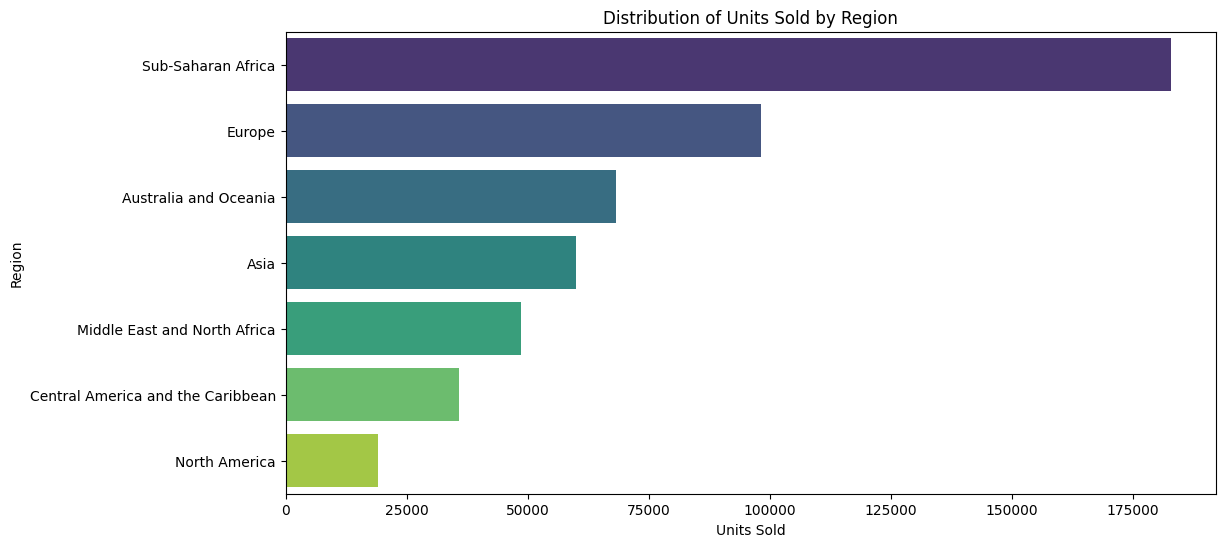

In [28]:
plt.figure(figsize=(12, 6))
units_sold_by_region = data.groupby('Region')['Units Sold'].sum().reset_index().sort_values(by='Units Sold', ascending=False)
sns.barplot(x='Units Sold', y='Region', data=units_sold_by_region, palette="viridis")
plt.title('Distribution of Units Sold by Region')
plt.show()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_10152\563522037.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='Item Type', data=revenue_by_item_type, palette="viridis")


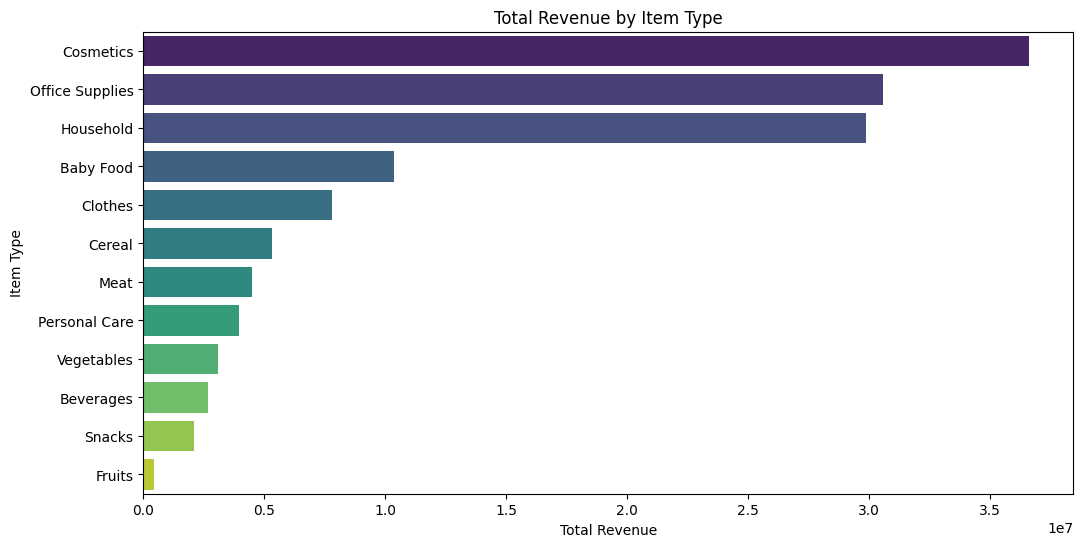

In [29]:
plt.figure(figsize=(12, 6))
revenue_by_item_type = data.groupby('Item Type')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)
sns.barplot(x='Total Revenue', y='Item Type', data=revenue_by_item_type, palette="viridis")
plt.title('Total Revenue by Item Type')
plt.show()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_10152\2840504966.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Profit', y='Order Priority', data=profit_by_order_priority, palette="viridis")


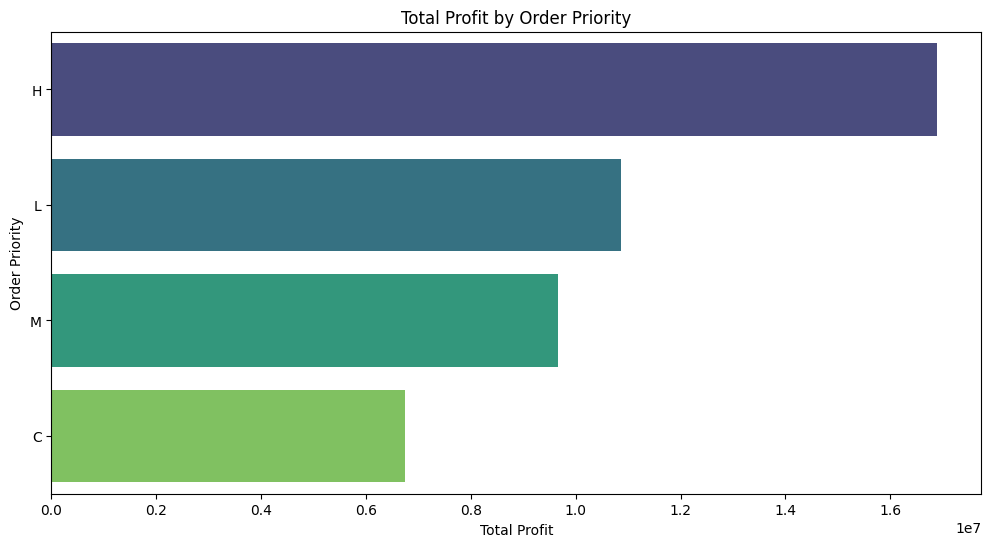

In [30]:
plt.figure(figsize=(12, 6))
profit_by_order_priority = data.groupby('Order Priority')['Total Profit'].sum().reset_index().sort_values(by='Total Profit', ascending=False)
sns.barplot(x='Total Profit', y='Order Priority', data=profit_by_order_priority, palette="viridis")
plt.title('Total Profit by Order Priority')
plt.show()

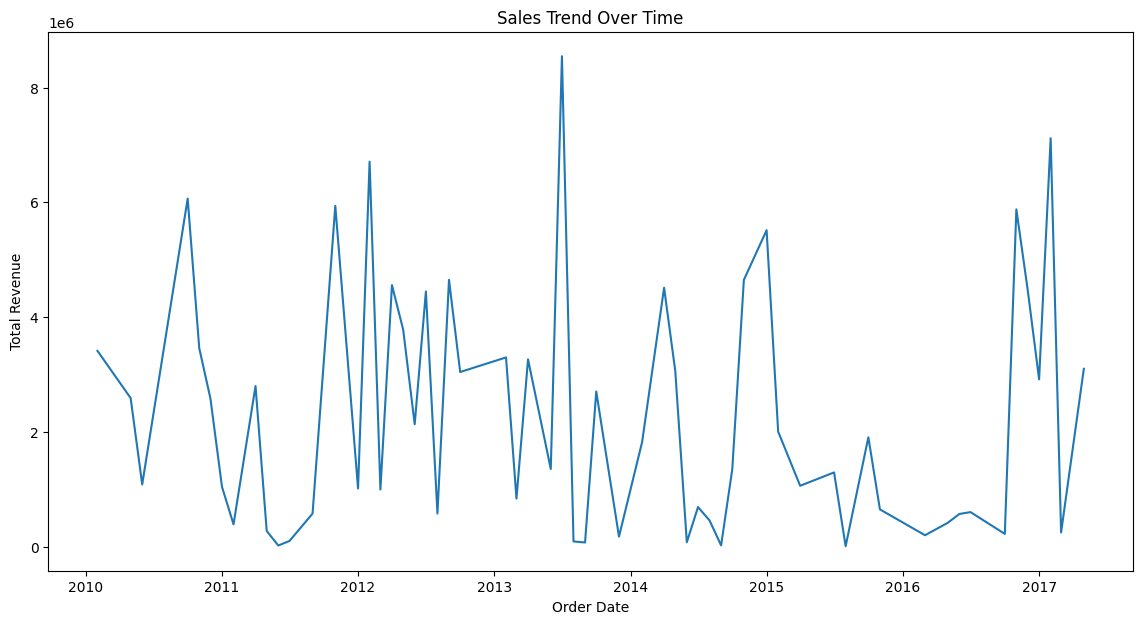

In [50]:
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

plt.figure(figsize=(14, 7))
sales_trend = data.groupby(data['Order Date'].dt.to_period("M"))['Total Revenue'].sum().reset_index()
sales_trend['Order Date'] = sales_trend['Order Date'].dt.to_timestamp()
sns.lineplot(x='Order Date', y='Total Revenue', data=sales_trend)
plt.title('Sales Trend Over Time')
plt.show()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_10152\4044968761.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Item Type', y='Profit Margin', data=profit_margin_by_item, palette="coolwarm")


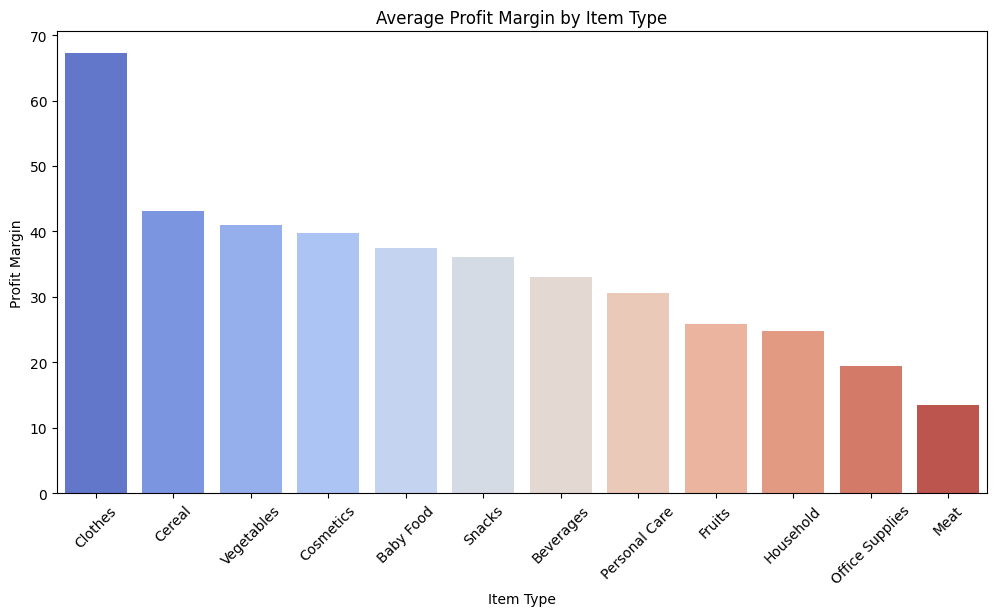

In [35]:
data['Profit Margin'] = (data['Total Profit'] / data['Total Revenue']) * 100
plt.figure(figsize=(12, 6))
profit_margin_by_item = data.groupby('Item Type')['Profit Margin'].mean().reset_index().sort_values(by='Profit Margin', ascending=False)
sns.barplot(x='Item Type', y='Profit Margin', data=profit_margin_by_item, palette="coolwarm")
plt.title('Average Profit Margin by Item Type')
plt.xticks(rotation=45)
plt.show()

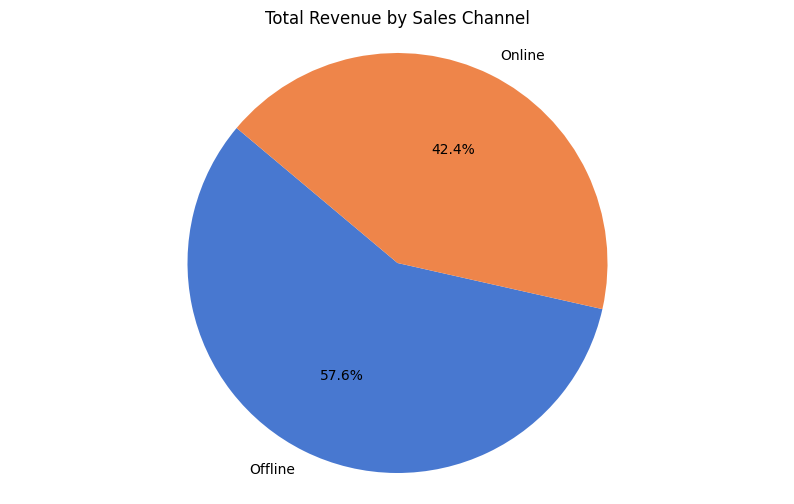

In [37]:
sales_channel_performance = data.groupby('Sales Channel')['Total Revenue'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.pie(sales_channel_performance['Total Revenue'], labels=sales_channel_performance['Sales Channel'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("muted"))
plt.title('Total Revenue by Sales Channel')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

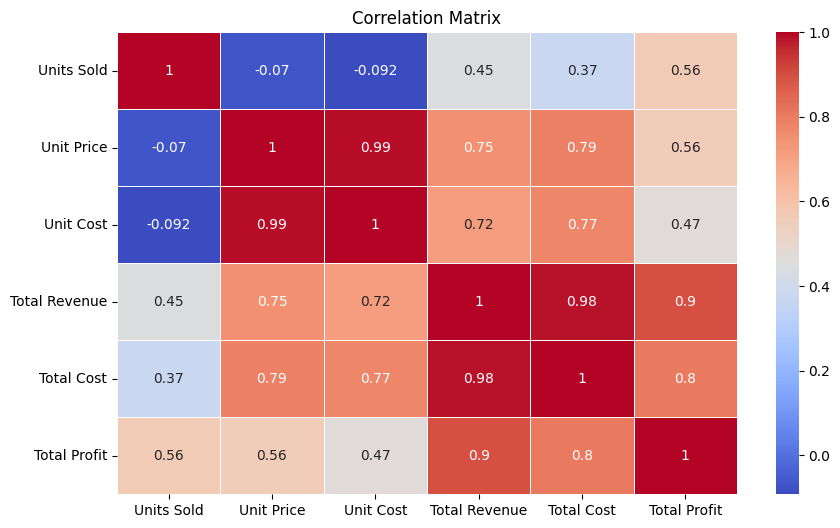

In [38]:
corr_matrix = data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_10152\3399795330.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Revenue', y='Country', data=top_countries, palette="magma")


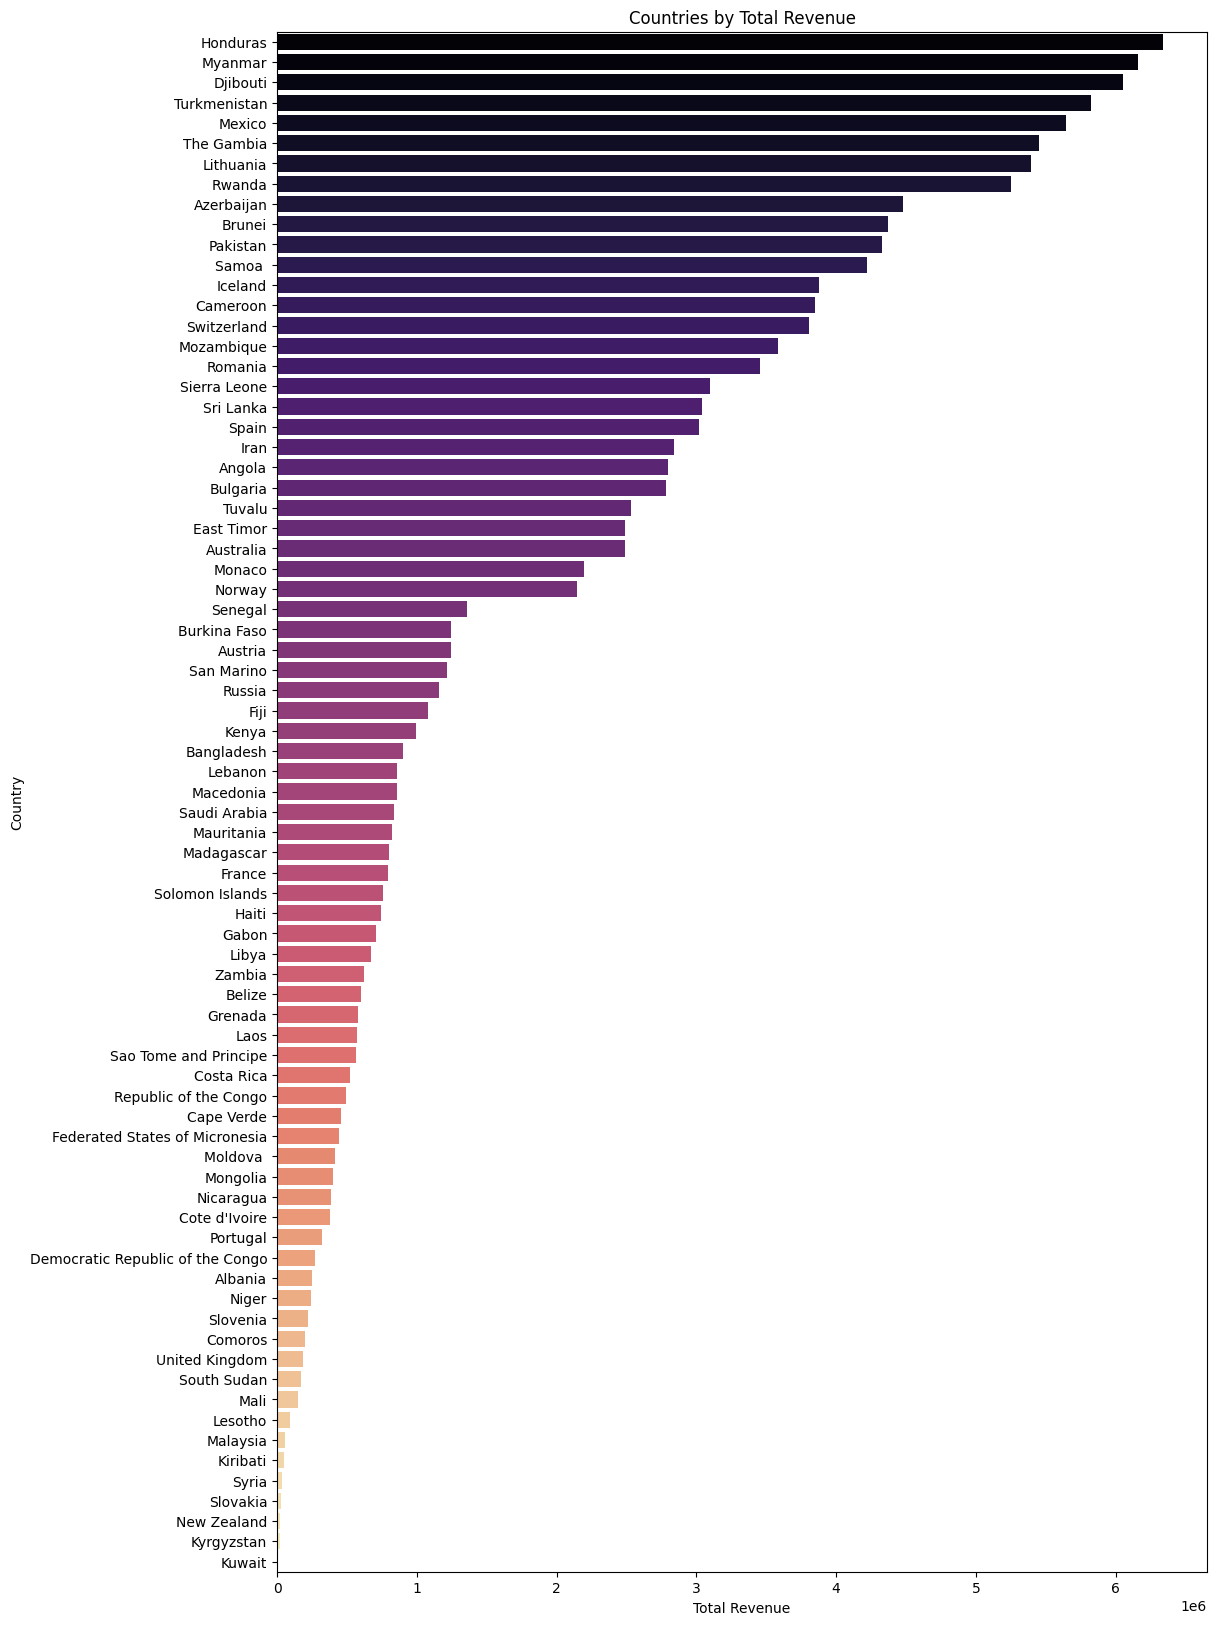

In [45]:
top_countries = data.groupby('Country')['Total Revenue'].sum().reset_index().sort_values(by='Total Revenue', ascending=False)
plt.figure(figsize=(12, 20))
sns.barplot(x='Total Revenue', y='Country', data=top_countries, palette="magma")
plt.title('Countries by Total Revenue')
plt.show()

C:\Users\Abhinav\AppData\Local\Temp\ipykernel_10152\3009931682.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total Cost', y='Item Type', data=total_cost_by_item_type, palette="coolwarm")


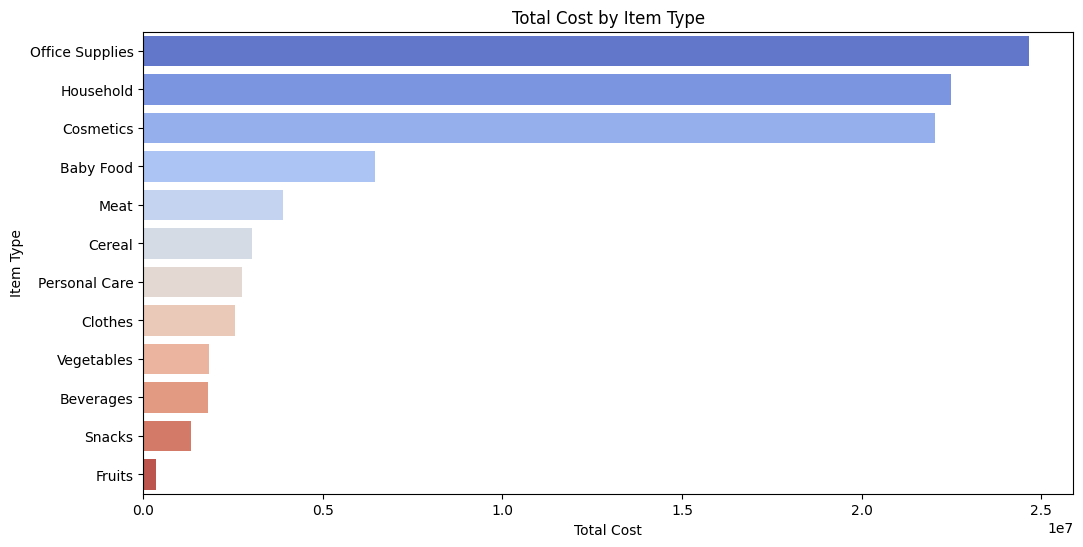

In [47]:
plt.figure(figsize=(12, 6))
total_cost_by_item_type = data.groupby('Item Type')['Total Cost'].sum().reset_index().sort_values(by='Total Cost', ascending=False)
sns.barplot(x='Total Cost', y='Item Type', data=total_cost_by_item_type, palette="coolwarm")
plt.title('Total Cost by Item Type')
plt.show()

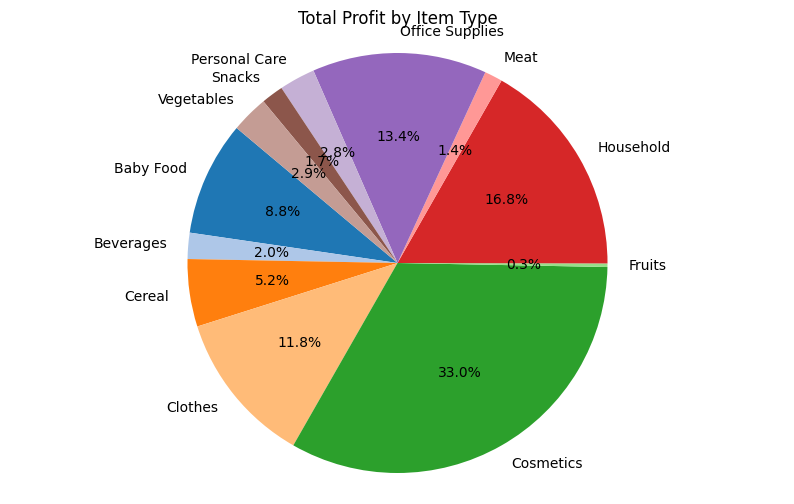

In [57]:
profit_by_item_type = data.groupby('Item Type')['Total Profit'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.pie(profit_by_item_type['Total Profit'], labels=profit_by_item_type['Item Type'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("tab20"))
plt.title('Total Profit by Item Type')
plt.axis('equal')
plt.show()